*Joel Reyes Toledo*

Universidad de La Laguna. Grado en Física, curso 2022-23

Física Computacional.


# Práctica 3
## **Ejercicio 1. Implementación de métodos de resolución de EDOs**

*Implementar al menos dos métodos de un paso y un método predictor-corrector para la resolución de ecuaciones diferenciales. Analizar y comentar las características de cada
método implementado*

**Métodos de un paso, de cuarto orden**

---


1.   *Método de Euler mejorado*

El método de Euler parte de una premisa sencilla, que es aproximar la solución de la EDO a la derivada de la siguiente manera:

$y_{i+1} = y_i + \frac{h}{2}\cdot \left[f(x_i, y_i) + f(x_{i+1}, y_i + h\cdot f(x_i, y_i))\right]$

Es un método sencillo de aplicar y que es útil para casos donde la derivada de la función no varíe rápidamente.

2.   *Método de Runge-Kutta*

El método de Runge-Kutta consiste en obtener el siguiente punto al que tenemos mediante una combinación ponderada de evaluación de la derivada en distintos puntos. La ventaja de este método respecto al de Euler es que no se enfoca en la derivada de la función en el punto siguiente, por lo que para EDOs con una gran variación en la derivada el método de Runge-Kutta es mucho más útil y aporta más precisión. El esquema computacional que sigue es el siguiente:

a. Se calculan los coeficientes $K_1$, $K_2$, $K_3$ y $K_4$ como:
$K_1 = f(x_i, y_i)$  
$K_2 = f(x_i+\frac{h}{2}, y_i+\frac{h}{2}K_1)$  
$K_3 = f(x_i+\frac{h}{2}, y_i+\frac{h}{2}K_2)$  
$K_4 = f(x_i+\frac{h}{2}, y_i+\frac{h}{2}K_3)$

b. Se aplican en la fórmula que nos dará el valor de la función en el siguiente punto:

$y_{i+1} = y_i + \frac{h}{6}(K_1 + 2K_2 + 2K_3+ K_4)$






In [ ]:
import numpy as np
import scipy as scp
import pylab as plt

# Implementación del método de Runge-Kutta
def runge_kutta(x0, y0, function, gap):
  k1 = function(x0, y0)
  k2 = function(x0 + 1/2*gap, y0 + 1/2*gap*k1)
  k3 = function(x0 + 1/2*gap, y0 + 1/2*gap*k2)
  k4 = function(x0 + gap, y0 + gap*k3)

  y = y0 + (gap/6)*(k1 + 2*k2 + 2*k3 + k4)
  return y

# Implementación del método de Euler mejorado
def Euler_mejorado(x0, y0, function, gap):
  y = y0 + (gap/2)*(function(x0, y0) +
                    function(x0 + gap, y0 + gap*function(x0, y0)))
  return y

**Método predictor-corrector (Milne-Simpson de cuarto orden)**

---

El método a implementar consistirá en aplicar la fórmula de Milne **(1)** como método predictor y la fórmula de Simpson **(2)** como corrector a los valores predichos. El modo de operar consiste en que a partir de cuatro valores iniciales ($y_0$, $y_1$, $y_2$ e $y_3$) se haga una predicción del siguiente valor, el $y_4$, utilizando Milne. Posteriormente, dicho valor es corregido utilizándolo en la fórmula de Simpson, dond es necesario para hacer una evaluación de la función en el punto a corregir.

* $y_{i+1} = y_{i-3}+\frac{4h}{3}\left [2f(x_i,y_i)-f(x_{i-1},y_{i-1})+2f(x_{i-2},y_{i-2})\right ]$ **(1)**

* $y_{i+1} = y_{i-1}+\frac{h}{3}\left [f(x_{i+1},y_{i+1})+4f(x_i,y_i)+f(x_{i-1},y_{i-1})\right ]$ **(2)**

El programa está preparado para que se introduzca una única condición inicial $y_0$, de manera que se obtengan otras 3 condiciones iniciales, ya que este método precisa de 4 condiciones iniciales o de contorno. La manera de obtener estos otros puntos (que para mí serán $y_{-3}$, $y_{-2}$, $y_{-1}$) será empleando un método de un paso para conseguirlos. Que se escojan los puntos anteriores al inicial tiene que ver con que si se escogiesen los puntos siguientes a la condición inicial estos no serían corregidos por la fórmula de Simpson, de modo que nos llevará a error.

**Nota:** el signo "-" en el subíndice se refleja en la consola en el orden en el que aparecen los otros valores iniciales.

In [ ]:
# Predictor corrector usando la fórmula de Runge-Kutta
def pred_cor_rk(x0, y0, function, gap):
  x = np.arange(x0 - 5*gap, x0, gap)

  y1 = runge_kutta(x0, y0, function, -gap)
  y2 = runge_kutta(x0 - gap, y1, function, -gap)
  y3 = runge_kutta(x0 - 2*gap, y2, function, -gap)

  y = np.array([y3, y2, y1, y0])

  #Predictor:
  y_p4 =  y[0] + (4*gap/3)*(2*function(x[3], y[3]) - function(x[2], y[2]) +
                            2*function(x[1], y[1]))

  #Corrector
  y_4 = y[2] + (gap/3)*(function(x[4], y_p4) + 4*function(x[3], y[3]) +
                        function(x[2], y[2]))

  return y_4

In [ ]:
# Predictor corrector utilizando el método de Euler mejorado
def pred_cor_em(x0, y0, function, gap):
  x = np.arange(x0 - 5*gap, x0, gap)

  y1 = Euler_mejorado(x0, y0, function, -gap)
  y2 = Euler_mejorado(x0 - gap, y1, function, -gap)
  y3 = Euler_mejorado(x0 - 2*gap, y2, function, -gap)

  y = np.array([y3, y2, y1, y0])

  y_p4 =  y[0] + (4*gap/3)*(2*function(x[3], y[3]) - function(x[2], y[2]) +
                            2*function(x[1], y[1]))

  y_4 = y[2] + (gap/3)*(function(x[4], y_p4) + 4*function(x[3], y[3]) +
                        function(x[2], y[2]))

  return y_4

# **Ejercicio 2. Aplicación de los métodos implementados**

*Se pretende calcular la cantidad restante de una sustancia que se desintegra
radiactivamente. La ecuación diferencial que rige este fenómeno es
$y'(t)=Ky(t)$ donde $K$ es una constante de proporcionalidad que depende de la sustancia estudiada, $y(t)$ es la cantidad de sustancia restante en el instante $t$ con lo que $y(0) = y_0$ representaría la cantidad inicial de dicha sustancia. Sabemos que la solución a esta ecuación diferencial es $y(t)=y_0e^{Kt}$ con $K = -ln(2)/\tau$ y donde $\tau$ representa el tiempo de vida media de la sustancia radiactiva. Plantear y resolver numéricamente esta EDO de primer orden aplicando en este caso al estudio de datación basada en el análisis de $^{14}C$ . La vida media del $^{14}C$ es de 5600 años y queremos estimar la edad de un objeto encontrado en el que se ha medido que el $33.7 \%$ de $^{14}C$ se ha desintegrado.*

---




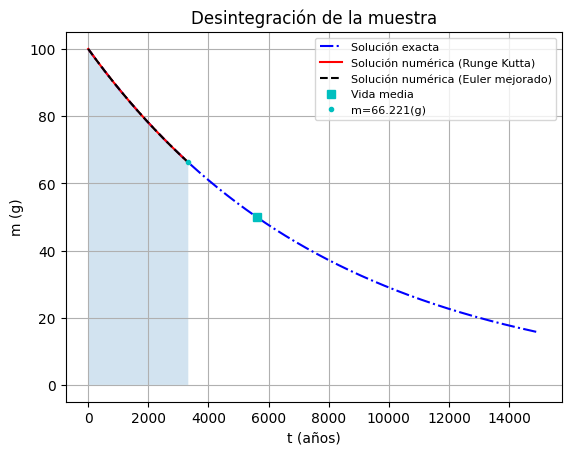

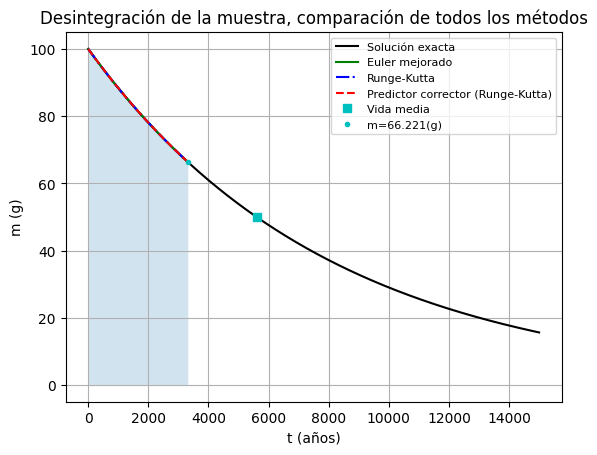


Tardará 3330 años en desintegrarse hasta perder un 33.7% de su masa, que será de 66.221 gramos.


In [ ]:
# Condiciones iniciales:
m_0 = 100.0 # 100 gramos
tau = 5600.0 # años
des = m_0 - 0.337*m_0
t_0 = 0

h = 10
K = -np.log(2)/tau

# En este apartado
# Creamos un array para elaborar las gráficas
t_pc_rk = t_pc_em = np.array([t_0])
m_pc_rk = m_pc_em = np.array([m_0])

def sol(t):
  return m_pc_rk[0]*(np.e**(K*t))

def func(x, y):
  return K*y

# Hacemos un bucle para llamar a la función hasta que se cumpla la condición
# Usando el método de Runge-Kutta en el predictor corrector
while m_pc_rk[-1] > des:
  t_0 += h
  t_pc_rk = np.append(t_pc_rk, t_0)
  m_0 = pred_cor_rk(t_0, m_0, func, h)
  m_pc_rk = np.append(m_pc_rk, m_0)

#Recuperamos los valores iniciales
m_0 = m_pc_rk[0]
t_0 = t_pc_rk[0]

# Usando el método de Euler mejorado en el predictor corrector
while m_pc_em[-1] > des:
  t_0 += h
  t_pc_em = np.append(t_pc_em, t_0)
  m_0 = pred_cor_em(t_0, m_0, func, h)
  m_pc_em = np.append(m_pc_em, m_0)

t_sol = np.linspace(0, 15000, 1000)

plt.plot(t_sol, sol(t_sol), "b-.", label = "Solución exacta")
plt.plot(t_pc_rk, m_pc_rk, "r-", label = "Solución numérica (Runge Kutta)")
plt.plot(t_pc_em, m_pc_em, "k--", label = "Solución numérica (Euler mejorado)")

plt.plot(tau, sol(tau), "cs", label = "Vida media")
plt.plot(t_pc_rk[-1], m_pc_rk[-1], "c.",
         label = f"m={round(m_pc_rk[-1], 3)}(g)")
plt.fill_between(t_pc_rk, m_pc_rk, alpha = 0.2)

plt.grid()
plt.xlabel("t (años)")
plt.ylabel("m (g)")
plt.title("Desintegración de la muestra")
plt.legend(loc = "best", fontsize = 8)
plt.show()

#-------------------------------------------------------------------------------
# Ahora lo resolvemos utilizando los métodos de Runge-Kutta y de Euler mejorado

m_0 = m_pc_rk[0]
t_0 = t_pc_rk[0]

m_em = m_rk = np.array([m_0])
t_em = t_rk = np.array([t_0])

while m_rk[-1] > des:
  t_0 += h
  t_rk = np.append(t_rk, t_0)
  m_0 = pred_cor_rk(t_0, m_0, func, h)
  m_rk = np.append(m_rk, m_0)

m_0 = m_rk[0]
t_0 = t_rk[0]

while m_em[-1] > des:
  t_0 += h
  t_em = np.append(t_em, t_0)
  m_0 = pred_cor_rk(t_0, m_0, func, h)
  m_em = np.append(m_em, m_0)

# Se grafican todos los métodos implementados para contrastarlos
plt.plot(t_sol, sol(t_sol), "k-", label = "Solución exacta")
plt.plot(t_em, m_em, "g-", label = "Euler mejorado")
plt.plot(t_rk, m_rk, "b-.", label = "Runge-Kutta")
plt.plot(t_pc_rk, m_pc_rk, "r--", label = "Predictor corrector (Runge-Kutta)")

plt.plot(tau, sol(tau), "cs", label = "Vida media")
plt.plot(t_pc_rk[-1], m_pc_rk[-1], "c.",
         label = f"m={round(m_pc_rk[-1], 3)}(g)")
plt.fill_between(t_pc_rk, m_pc_rk, alpha = 0.2)

plt.grid()
plt.xlabel("t (años)")
plt.ylabel("m (g)")
plt.title("Desintegración de la muestra, comparación de todos los métodos")
plt.legend(loc = "best", fontsize = 8)
print("")
plt.show()

print("")
print(f"Tardará {t_pc_rk[-1]} años en desintegrarse hasta perder un 33.7% \
de su masa, que será de {round(m_pc_rk[-1], 3)} gramos.")

Se puede apreciar que el método predictor corrector proporciona una buena aproximación a la solución exacta para este caso. En todo momento la solución numérica se superpone a la solución exacta proporcionada. Además, vemos que no hay diferencia notoria, al menos en este caso, en aplicar el método de Runge-Kutta o el de Euler mejorado en la función del predictor corrector.

De igual manera, se concluye que para este problema todos los métodos son igual de correctos ya que no hay variación apreciable en la representación gráfica de la solución numérica.

# **Ejercicio 3. Ecuación de Lane-Emden**

*Plantear y resolver un problema físico que esté representado por una ecuación de segundo orden.*

---

Se escoge como problema el resolver numéricamente la ecuación de Lane-Emden, que simula el perfil de potencial gravitatorio de un cuerpo polítropo. Su forma de ecuación diferencial de orden 2 para un cuerpo de simetría esférica es la siguiente:

$\frac{d^2\phi}{dr^2} + \frac{2}{r}\frac{d\phi}{dr} = 4\pi G\left(\frac{-\phi}{(n+1)K}\right)^n$

Donde $\phi$ es la función del potencial gravitatorio, $K$ es la *constante politrópica* y $n$ es el *índice politrópico*. Son de interés los casos en los que $0\leq n \leq 5$, ya que son los que tienen sentido físico. En este estudio se realizará un análisis de los casos enteros aunque también se puede editar el código para tomar valores racionales.

Para resolver esta EDO numéricamente es aconsejable escribirla de manera adimensional para que la precisión del método no se vea afectada. Para ello hacemos:

$z = Ar \ \ ; \ \ A^2 = \frac{4\pi G}{(n+1)^nK^n}\left(-\phi_c\right)^{n-1}$

$w = \frac{\phi}{\phi_c} = \left(\frac{\rho}{\rho_c}\right)^{1/n}$

Resultando la ecuación de Lane-Emden como:

$\frac{d^w}{dz^2} + \frac{2}{z} \frac{dw}{dz} + w^n = 0$

De aquí nos interesa hallar $w(z)$. Para hallarlo transformamoso la EDO de segundo orden en una de primer, para lo que definimos:

$y^0 = w \ \ , \ \ y^1 = \frac{dw}{dz}$

Finalmente, el sistema de EDOs a resolver es el siguiente:

$\frac{dy^0}{dz}=y^1 \atop \frac{dy^1}{dz} = -\frac{2}{z}y^1 -(y^0)^n$

Donde las condiciones iniciales vienen dadas por $w(0) = 1$, que refiere a que el potencial gravitatorio en $r=R$ (en el radio de la estrella) es nulo, y, para evitar el punto singular que tiene la ecuación en $z=0$ se obliga a que $w'(0) = 0$. Con esto ya se puede proceder a resolver la *ecuación de Lane-Emden*

In [ ]:
#Corrección del método pde Runge-Kutta para que resuelva EDO de orden 2

# La entrada F es un array de dos funciones
# f0 es un array que contiene las condiciones iniciales

def rk_orden2(zi, yi, F, h):
  y = np.zeros((len(zi), 2))
  y[0,:] = yi
  h2 = h/2

  for i in range(len(zi) - 1):
    k1 = np.array([F(zi[i], y[i, :])[0], F(zi[i], y[i, :])[1]])
    k2 = np.array([F(zi[i] + h2, y[i, :] + h2*k1)[0],
                   F(zi[i] + h2, y[i, :] + h2*k1)[1]])
    k3 = np.array([F(zi[i] + h2, y[i, :] + h2*k2)[0],
                   F(zi[i] + h2, y[i, :] + h2*k2)[1]])
    k4 = np.array([F(zi[i] + h2, y[i, :] + h2*k3)[0],
                   F(zi[i] + h2, y[i, :] + h2*k3)[1]])

    y[i+1,:] = y[i,:] + (h/6)*(k1 + 2*k2 + 2*k3 +k4)
  return y


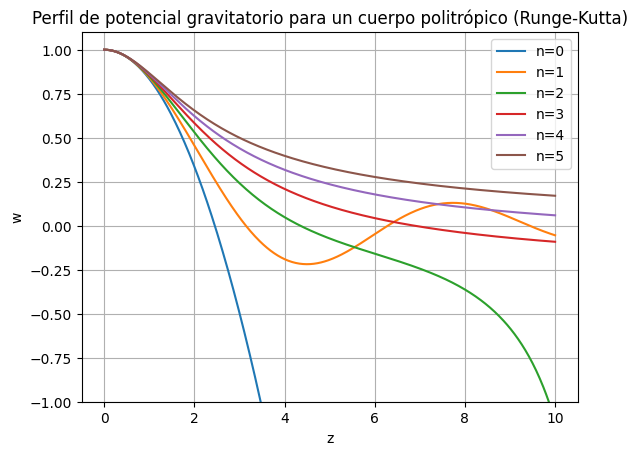

In [ ]:
z = np.linspace(0.001, 10, 500)
w_0 = np.array([1, 0])

def funcion(zi, yi):
  return np.array([yi[1], (-2/zi)*(yi[1]) - (yi[0])**n])

for n in range(6):
  plt.plot(z, rk_orden2(z, w_0, funcion, 0.02)[:,0], label = f"n={n}")

plt.ylim(-1, 1.1)
plt.legend(loc = "best")
plt.grid()
plt.xlabel("z")
plt.ylabel("w")
plt.title("Perfil de potencial gravitatorio para un cuerpo politrópico \
(Runge-Kutta)")

plt.show()

In [ ]:
#Corrección del método de Euler mejorado para que resuelva EDOs de orden 2
def em_orden2(zi, yi, F, h):
  y = np.zeros((len(zi), 2))
  y[0,:] = yi
  for i in range(len(zi) - 1):
    y[i+1,:] = y[i,:] + h*(1/2)*F(zi[i] + h, y[i,:] + h*F(zi[i], y[i,:]))

  return y

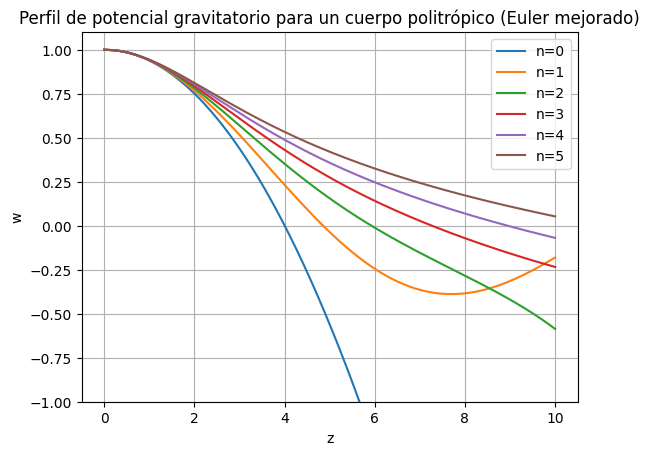

In [ ]:
# Es necesario ejecutar el código anterior (se usan función y las variables)

for n in range(6):
  plt.plot(z, em_orden2(z, w_0, funcion, 0.02)[:,0], label = f"n={n}")

plt.ylim(-1, 1.1)
plt.legend(loc = "best")
plt.grid()
plt.xlabel("z")
plt.ylabel("w")
plt.title("Perfil de potencial gravitatorio para un cuerpo politrópico \
(Euler mejorado)")

plt.show()

In [ ]:
def pc_orden2(zi, yi, F, h):
  x = np.arange(zi[0] - 5*h, zi[0], h)
  x1 = zi[0]
  x2 = zi[0] - h
  x3 = zi[0] - 2*h

  y = np.zeros((len(zi), 2))
  y[0,:] = yi

  y1 = runge_kutta(x1, yi, F, -h)
  y2 = runge_kutta(x2, y1, F, -h)
  y3 = runge_kutta(x3, y2, F, -h)
  y[1,:] = y1
  y[2,:] = y2
  y[3,:] = y3

  yc = y

  for i in range(3, len(zi)-1):
    y[i+1,:] = y[i-3] + (4*h/3)*(2*F(zi[i], y[i,:]) - F(zi[i-1], y[i-1,:]) +
                                 2*F(zi[i-2], y[i-2,:]))
    yc[i+1,:] = y[i-1,:] + (h/3)*(F(zi[i+1], y[i+1,:]) + 4*F(zi[i], y[i,:]) +
                                  F(zi[i-1], y[i-1,:]))

  return yc

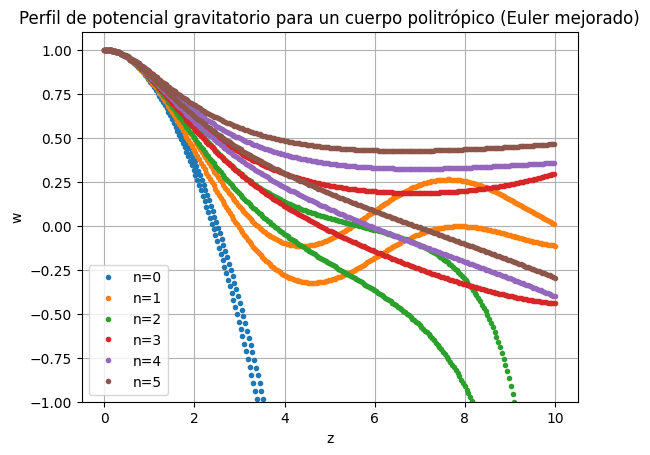

In [ ]:
for n in range(6):
  plt.plot(z, pc_orden2(z, w_0, funcion, 0.02)[:,0],".", label = f"n={n}")

#n=5
#print((pc_orden2(z, w_0, funcion, 0.02)[:,0]))

plt.ylim(-1, 1.1)
plt.legend(loc = "best")
plt.grid()
plt.xlabel("z")
plt.ylabel("w")
plt.title("Perfil de potencial gravitatorio para un cuerpo politrópico \
(Euler mejorado)")

plt.show()

Al tener problemas con el método predictor corrector, procederé sólo a comparar el método de Runge-Kutta con el método de Euler mejorado.

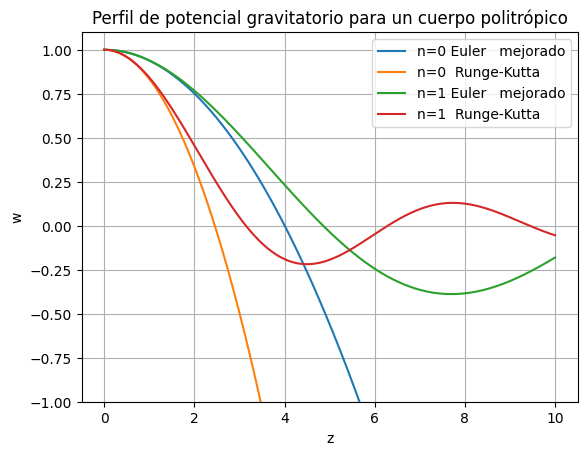

In [ ]:
for n in range(2):
  plt.plot(z, em_orden2(z, w_0, funcion, 0.02)[:,0], label = f"n={n} Euler \
  mejorado")
  plt.plot(z, rk_orden2(z, w_0, funcion, 0.02)[:,0], label = f"n={n}\
  Runge-Kutta")

plt.ylim(-1, 1.1)
plt.legend(loc = "best")
plt.grid()
plt.xlabel("z")
plt.ylabel("w")
plt.title("Perfil de potencial gravitatorio para un cuerpo politrópico")

plt.show()

Se ha hecho una comparación solo para dos valores de n para no sobrecargar la gráfica, pero se puede apreciar como el método de Runge-Kuta proporciona un valor mucho más preciso a los teóricos. Esto se nota precisamente para $n=1$, donde vemos que, pese a que ambos llegan a tener la misma forma, el método de Euler da una gráfica de una curva más distendida en el eje de las $z$. Es decir, es como si el método de Euler desplazase los puntos hacia la derecha, hecho que se puede volver a apreciar en $n=0$.

Se concluye entonces que el método de Euler no es un método fiable para la resolución numérica de ecuaciones diferenciales de orden 2, mientras que el método de Runge-Kutta si.

# **Ejercicio 4. Comparación con otros métodos incluidos en librerías**

*Comparar los resultados obtenidos con alguna de las implementaciones presentadas y
con procedimientos ya presentes en librerías como Scipy.*

---



In [ ]:
import scipy.integrate as sci

#Librería scipy
sol_sci = sci.odeint(F, w_0, z, tfirst = "true")

sol2_sci = sci.solve_ivp(F, [0.01, 10], [1, 0])

#Comparamos solo para el caso de n=3
plt.plot(z, sol_sci[:,0], "k-", label = "odeint")
plt.plot(sol2_sci.t, sol2_sci.y[0,:], "b-.", label = "solve_ivp")
plt.plot(z, rk_orden2(z, w_0, F, 0.02)[:,0], "g--", label = "Runge-Kutta")
plt.plot(z, em_orden2(z, w_0, F, 0.02)[:,0], "c-.", label = "Euler mejorado")

plt.ylim(-1, 1.1)
plt.legend(loc = "best")
plt.grid()
plt.xlabel("z")
plt.ylabel("w")
plt.title("Perfil de potencial gravitatorio para un cuerpo politrópico")

plt.show()


NameError: ignored

Vemos que el único método que no coincide, ni se asemeja al real, es el método de Euler, por lo que esto refuerza la conclusión anterior de que el método de Runge-Kutta es muy fiable.

# **Anexo. Solución gráfica del problema 3**

El problema planteado se ha encontrado en los apuntes hechos por Ignacio González Martínez-Pais y Teodoro Roca Cortés para la asignatura de Métodos Matemáticos 4. En el planteamiento que se hace del problema se proporciona la gráfica de un caso para guiarse, que es la siguiente:
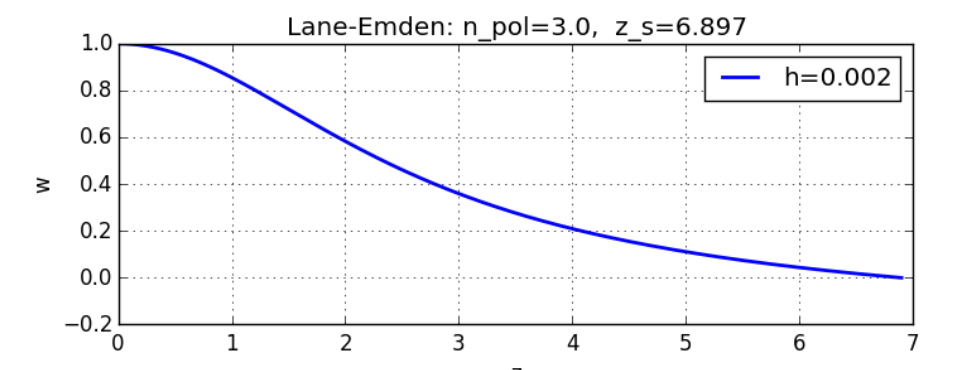

Además, se ha encontrado la siguiente gráfica también como guía para contrastar los resultados obtenidos:

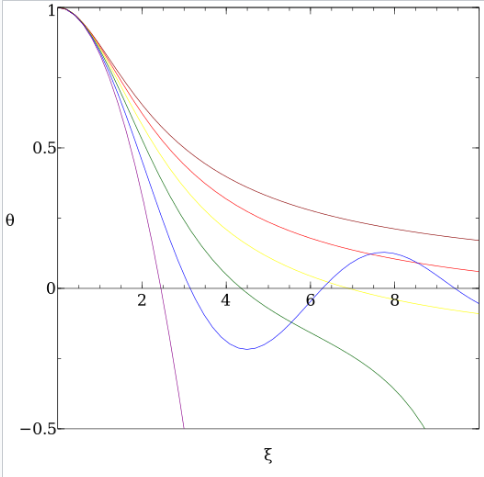

Donde para nosotros $\theta = w$ y $\xi = z$